In [2]:
pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 864.1/864.1 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 56.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


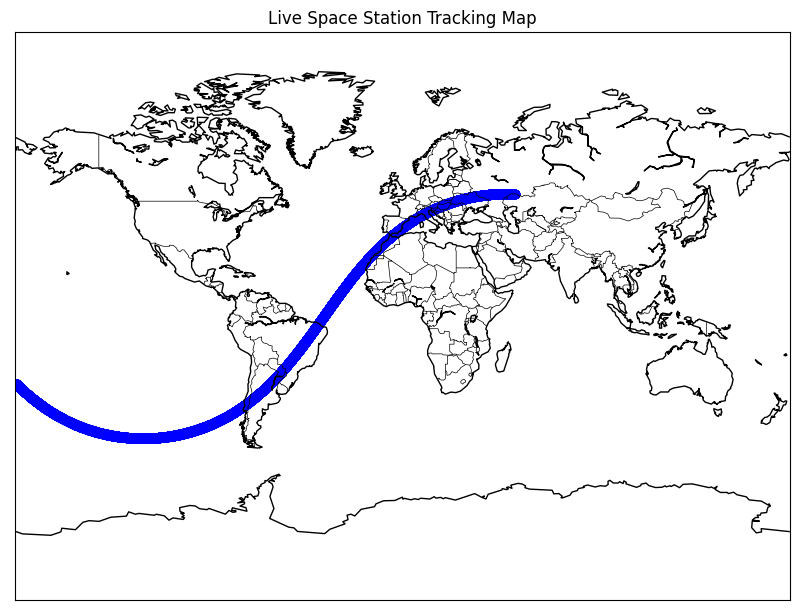

<Figure size 640x480 with 0 Axes>

In [1]:
import requests
import json
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import time

#Creating  a figure with size 10/10
fig = plt.figure(figsize=(10, 10))

#Creating two lists for longitude and latitude
longitude_list = []
latitude_list = []

#Creating a basemap for projecting and choosing longitude as 0
m = Basemap(projection='mill', lon_0=0)

#Plotting the title
plt.title('Live Space Station Tracking Map')

#Adding the ur;
url = 'http://api.open-notify.org/iss-now.json'

# Set the starting time for the data streaming
starting_time = time.time()

#Using a while loop for running almost 3600
while time.time() - starting_time < 3600:
    response = requests.get(url).json()
    # Get the longitude of the map
    long = float(response['iss_position']['longitude'])
     # Get the latitude of the map
    lat = float(response['iss_position']['latitude'])
    
    #Adding the extra list to the existing longitude list 
    longitude_list.append(long)
     #Adding the extra list to the existing latitude list 
    latitude_list.append(lat)

x, y = m(longitude_list, latitude_list)    
m.plot(x, y, 'bo', markersize=6)

# Draw the coastlines and the countries
m.drawcoastlines()
m.drawcountries()

# Save the plot as an image file
plt.show()
plt.savefig('iss2_location.png')
plt.pause(0.001)
time.sleep(5)